In [11]:
import numpy as np
from numerical_integrators.adaptive_step import rkf45
import os
cwd = os.getcwd()
print(cwd)

/home/arne/Documents/physicsproject/calculation_scripts


In [2]:
def deriv(t, x):
    return (1/((1+t**2)))

In [30]:
x0 = np.array([0])
t0 = np.array([0])

def trajectory(t0, tmax, pos_init, deriv, integrator):
    T = [t0]
    X = [pos_init]
    
    h = np.array([1e-1])
    
    t = t0
    t_ = t
    x = pos_init
    while t < tmax:
        h = np.minimum(h, tmax - t)
        t, x, h = integrator(t, x, h, deriv)
        if t > t_:
            T.append(t)
            X.append(x)
        t_ = t
    return np.asarray(T), np.asarray(X)

In [38]:
tmax = 1000

integrator = rkf45

print(integrator.__doc__)

T, X = trajectory(t0, tmax, x0, deriv, integrator)

   This function attempts a single time step forwards, using the
    Runge-Kutta-Fehlberg 4(5) adaptive timestep integrator scheme. If
    the new step is not accepted, the time level and the coordinates
    are not updated, while the time increment is refined.

    The Runge-Kutta-Fehlberg 4(5) method calculates two independent
    approximations to a step forwards in time for an ODE system, of
    fifth and fourth order, respectively. The scheme is tuned such
    that the error of the fourth order solution is minimal.

    The fifth order solution (interpolant) is used in order to find
    a criterion for rejecting / accepting the trial step:
        - If the difference between the two solutions is larger than
          some threshold, the solution is rejected, and the time
          increment refined
        - If the difference between the solutions is smaller than or
          equal to some threshold, the fourth order solution is
          accepted, and the solver attempts to incre

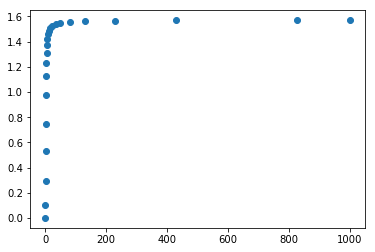

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
plt.plot(T, X, 'o')


In [40]:
X

array([[ 0.        ],
       [ 0.09966865],
       [ 0.29145685],
       [ 0.53136942],
       [ 0.74937395],
       [ 0.97592286],
       [ 1.12386502],
       [ 1.22886323],
       [ 1.30828953],
       [ 1.37015287],
       [ 1.41881505],
       [ 1.45707422],
       [ 1.48695628],
       [ 1.51004579],
       [ 1.52763836],
       [ 1.54081732],
       [ 1.55049575],
       [ 1.5584638 ],
       [ 1.5631535 ],
       [ 1.56645836],
       [ 1.56847409],
       [ 1.56959704],
       [ 1.56980706]])

In [41]:
np.pi/4

0.7853981633974483

In [42]:
X[-1] - np.pi/4

array([ 0.7844089])